In [110]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [111]:
dataset = pd.read_csv('./datasets/AMZN.csv')
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


In [112]:
dataset = dataset[['Date', 'Close']]
dataset.head()

,Date,Close
0,1997-05-15,0.097917
1,1997-05-16,0.086458
2,1997-05-19,0.085417
3,1997-05-20,0.081771
4,1997-05-21,0.071354


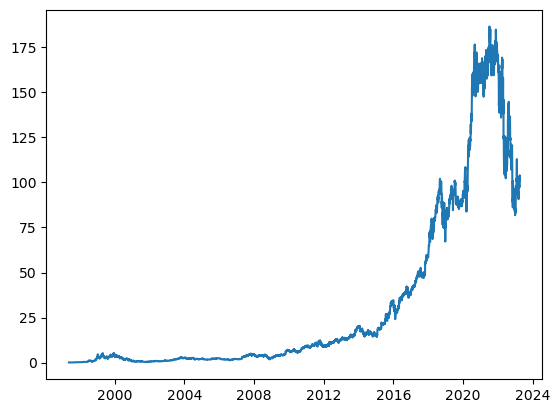

In [113]:
plt.plot(pd.to_datetime(dataset['Date']), dataset['Close'])

In [114]:
def prepare_dataset(dataset, n_steps):
    dataset.set_index('Date', inplace=True)
    for i in range(1, n_steps+1):
        dataset[f"Close(t-{i})"] = dataset['Close'].shift(i)

    dataset.dropna(inplace=True)
    return dataset

look_back = 7
shifted_df = prepare_dataset(dataset, look_back)
shifted_df

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
Date,,,,,,,,
1997-05-27,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417,0.086458,0.097917
1997-05-28,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417,0.086458
1997-05-29,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417
1997-05-30,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771
1997-06-02,0.075521,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354
...,...,...,...,...,...,...,...,...
2023-03-30,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997,100.610001
2023-03-31,103.290001,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997
2023-04-03,102.410004,103.290001,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999


In [115]:
shifted_df_numpy = shifted_df.to_numpy()

scalar = MinMaxScaler(feature_range=(-1,1))
shifted_df_numpy = scalar.fit_transform((shifted_df_numpy))

shifted_df_numpy[:5]

array([[-0.99991063, -0.99995531, -1.        , -0.99998325, -0.99987154,
        -0.99983244, -0.99982128, -0.99969839],
       [-0.99993855, -0.99991063, -0.99994415, -1.        , -0.99998325,
        -0.99987154, -0.99983244, -0.99982128],
       [-0.99995253, -0.99993855, -0.99989946, -0.99994415, -1.        ,
        -0.99998325, -0.99987154, -0.99983244],
       [-0.99995531, -0.99995253, -0.99992739, -0.99989946, -0.99994415,
        -1.        , -0.99998325, -0.99987154],
       [-0.99994973, -0.99995531, -0.99994136, -0.99992739, -0.99989946,
        -0.99994415, -1.        , -0.99998325]])

In [116]:
X = shifted_df_numpy[:, 1:]
y = shifted_df_numpy[:, 0]
print(X[1] , y[1])
print(X.shape, y.shape)

[-0.99991063 -0.99994415 -1.         -0.99998325 -0.99987154 -0.99983244
 -0.99982128] -0.999938552167786
(6509, 7) (6509,)


In [117]:
X = np.flip(X, axis = 1).copy()
X

array([[-0.99969839, -0.99982128, -0.99983244, ..., -0.99998325,
        -1.        , -0.99995531],
       [-0.99982128, -0.99983244, -0.99987154, ..., -1.        ,
        -0.99994415, -0.99991063],
       [-0.99983244, -0.99987154, -0.99998325, ..., -0.99994415,
        -0.99989946, -0.99993855],
       ...,
       [ 0.05779984,  0.05158   ,  0.0506149 , ...,  0.07431453,
         0.09308121,  0.10690997],
       [ 0.05158   ,  0.0506149 ,  0.04203581, ...,  0.09308121,
         0.10691495,  0.09747299],
       [ 0.0506149 ,  0.04203581,  0.07431453, ...,  0.10691495,
         0.09747802,  0.11398769]])

In [118]:
split_index = int(len(X)*0.95)
split_index

6183

In [119]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6183, 7), (326, 7), (6183,), (326,))

In [120]:
X_train = X_train.reshape((-1, look_back,1))
X_test = X_test.reshape((-1, look_back, 1))

y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6183, 7, 1), (326, 7, 1), (6183, 1), (326, 1))

In [121]:
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train).float()
y_test = torch.tensor(y_test).float()

In [122]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([6183, 7, 1]),
 torch.Size([326, 7, 1]),
 torch.Size([6183, 1]),
 torch.Size([326, 1]))

In [123]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class TimeSeriesData(Dataset):
    def __init__(self, X,y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        return self.X[index], self.y[index]

train_dataset = TimeSeriesData(X_train, y_train)
test_dataset = TimeSeriesData(X_test, y_test)

batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [124]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0], batch[1]
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 7, 1]) torch.Size([16, 1])


In [125]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

In [126]:
model = LSTM(input_size=1, hidden_size=4, num_stacked_layers=1)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [127]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch count: {epoch+1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0], batch[1]

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index %100 ==99:
            avg_loss_accross_batch = running_loss/100
            print(f'Batch count: {batch_index+1}, Loss:{avg_loss_accross_batch}')
            

In [128]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0], batch[1]

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_accross_batch = running_loss/100
    print(f'Validation Loss:{avg_loss_accross_batch}')
            

In [129]:
learning_rate = 0.001
epochs = 15
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)

for epoch in range(epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch count: 1
Batch count: 100, Loss:0.4104623794555664
Batch count: 200, Loss:0.5193570256233215
Batch count: 300, Loss:0.5500580668449402
Validation Loss:0.04575200944265816
Epoch count: 2
Batch count: 100, Loss:0.009394887834787369
Batch count: 200, Loss:0.01655229739844799
Batch count: 300, Loss:0.021459290757775307
Validation Loss:0.012899585559498519
Epoch count: 3
Batch count: 100, Loss:0.0029512185137718916
Batch count: 200, Loss:0.00544184073805809
Batch count: 300, Loss:0.0075118946842849255
Validation Loss:0.005852878918813076
Epoch count: 4
Batch count: 100, Loss:0.0014274705899879336
Batch count: 200, Loss:0.0023458043579012156
Batch count: 300, Loss:0.003044735873118043
Validation Loss:0.0018518625226533914
Epoch count: 5
Batch count: 100, Loss:0.00044253337546251714
Batch count: 200, Loss:0.0008377127232961357
Batch count: 300, Loss:0.0011186542687937617
Validation Loss:0.0012092841202684212
Epoch count: 6
Batch count: 100, Loss:0.00029857971821911633
Batch count: 200, 

In [130]:
with torch.no_grad():
    predicted_values = model(X_train).numpy()


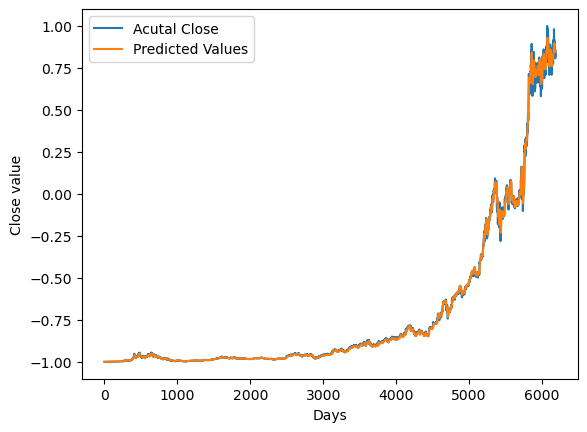

In [131]:
plt.plot(y_train, label = 'Acutal Close')
plt.plot(predicted_values, label = 'Predicted Values')
plt.xlabel("Days")
plt.ylabel('Close value')
plt.legend()
plt.show()

In [132]:
train_prediction = predicted_values.flatten()
dummies = np.zeros((X_train.shape[0], look_back+1))
dummies[:,0] =train_prediction
dummies = scalar.inverse_transform(dummies)

train_prediction = dummies[:,0]
train_prediction

array([  0.20468372,   0.20397784,   0.20299961, ..., 172.12854689,
       172.03572068, 172.36863557])

In [133]:
test_predictions = model(X_test).detach().numpy().flatten()
dummies = np.zeros((X_test.shape[0], look_back+1))
dummies[:, 0] = y_test.flatten()
dummies = scalar.inverse_transform(dummies)
test_predictions = dummies[:,0].copy()
test_predictions


array([170.01749949, 167.07899763, 170.41700626, 171.03700377,
       171.0684961 , 169.66949429, 170.66099675, 169.20100565,
       168.64449858, 166.71699707, 170.40449492, 167.52200227,
       164.35699578, 163.25399737, 162.55400179, 161.48599177,
       165.36199892, 165.20699954, 161.21400501, 162.13799851,
       158.91749416, 156.29899568, 151.66749509, 142.64300408,
       144.54400445, 139.98599336, 138.87249844, 139.63749627,
       143.97799855, 149.57350001, 151.19349835, 150.61250219,
       138.84550541, 157.63949825, 157.93550165, 161.41349717,
       161.18949925, 159.003495  , 153.29350176, 155.1670061 ,
       156.51049894, 158.10049453, 154.6524962 , 152.60149876,
       150.19749381, 144.82699629, 151.35800212, 153.78849709,
       153.56300403, 151.14199678, 152.05250627, 147.89849848,
       145.64100565, 137.45300383, 136.01449488, 139.27900567,
       146.81750468, 145.52450739, 141.8529947 , 147.36650272,
       153.10400311, 157.23899657, 161.25050521, 161.49

In [134]:
dummies = np.zeros((X_test.shape[0], look_back+1))
dummies[:, 0] = y_test.flatten()
dummies = scalar.inverse_transform(dummies)
new_y_test = dummies[:,0].copy()
print(new_y_test)

[170.01749949 167.07899763 170.41700626 171.03700377 171.0684961
 169.66949429 170.66099675 169.20100565 168.64449858 166.71699707
 170.40449492 167.52200227 164.35699578 163.25399737 162.55400179
 161.48599177 165.36199892 165.20699954 161.21400501 162.13799851
 158.91749416 156.29899568 151.66749509 142.64300408 144.54400445
 139.98599336 138.87249844 139.63749627 143.97799855 149.57350001
 151.19349835 150.61250219 138.84550541 157.63949825 157.93550165
 161.41349717 161.18949925 159.003495   153.29350176 155.1670061
 156.51049894 158.10049453 154.6524962  152.60149876 150.19749381
 144.82699629 151.35800212 153.78849709 153.56300403 151.14199678
 152.05250627 147.89849848 145.64100565 137.45300383 136.01449488
 139.27900567 146.81750468 145.52450739 141.8529947  147.36650272
 153.10400311 157.23899657 161.25050521 161.49149987 164.8890082
 163.4080074  163.64950785 164.77349929 168.99049174 169.31500275
 166.30099379 162.99749555 163.55999984 168.34649425 164.05499516
 158.75599734

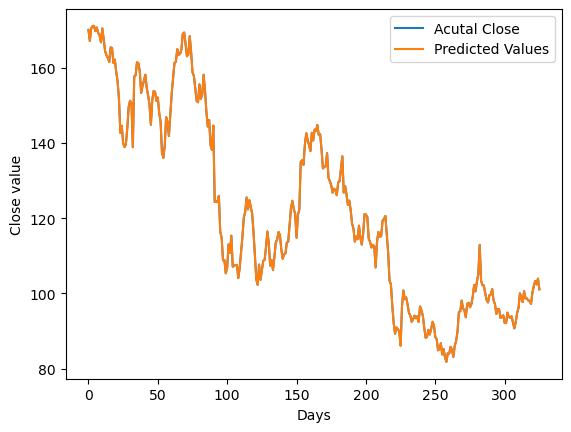

In [135]:
plt.plot(new_y_test, label = 'Acutal Close')
plt.plot(test_predictions, label = 'Predicted Values')
plt.xlabel("Days")
plt.ylabel('Close value')
plt.legend()
plt.show()